In [1]:
import matplotlib.pyplot as plt
import warp
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

This function is warped such that the first .2 of the period interval proceed at a normal speed, then the next .6 contains only the next .1 of the function, and the final .2 contains the remaining .7 of the function.

In [2]:
new_sin = warp.warp(np.sin, [0.2, .8], [.2, .1, .7], np.pi*2)

In [3]:
x = np.linspace(0, 2*np.pi, 1000)

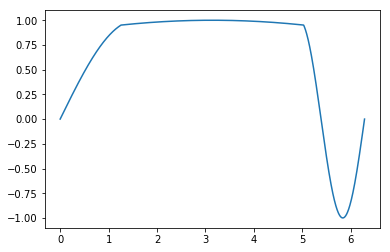

In [4]:
plt.plot(x, new_sin(x));

In [5]:
long_sin = warp.elongate(np.sin)

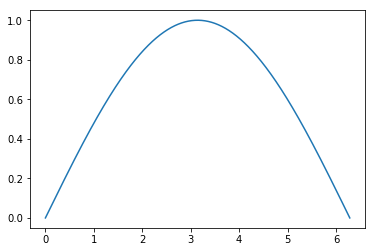

In [6]:
plt.plot(x, long_sin(x))

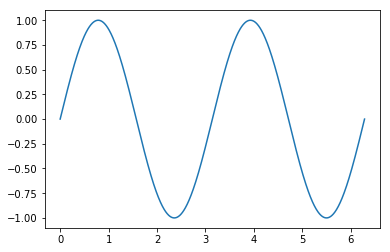

In [7]:
short_sin = warp.compress(np.sin)
plt.plot(x, short_sin(x))

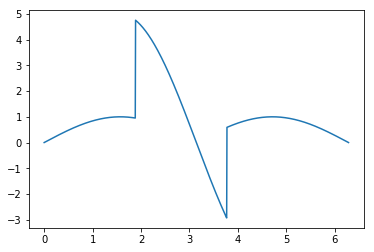

In [13]:
scaled_sin = warp.scale(np.sin, [.3, .6], [1, 5, -1], np.pi * 2)
plt.plot(x, scaled_sin(x))

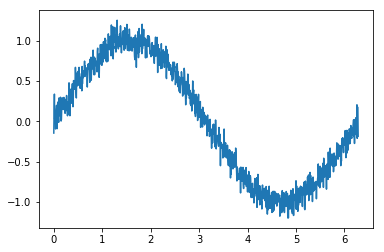

In [16]:
noisy_sin = warp.add_noise(np.sin, 0.1)
plt.plot(x, noisy_sin(x))